In [104]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools  

from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier   
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier 


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  
from sklearn.metrics import f1_score 

## Data Processing

In [106]:
df = pd.read_csv('creditcard.csv')


#Drop the time variable as it is not useful in the classifier model
df.drop('Time', axis=1, inplace=True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [107]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

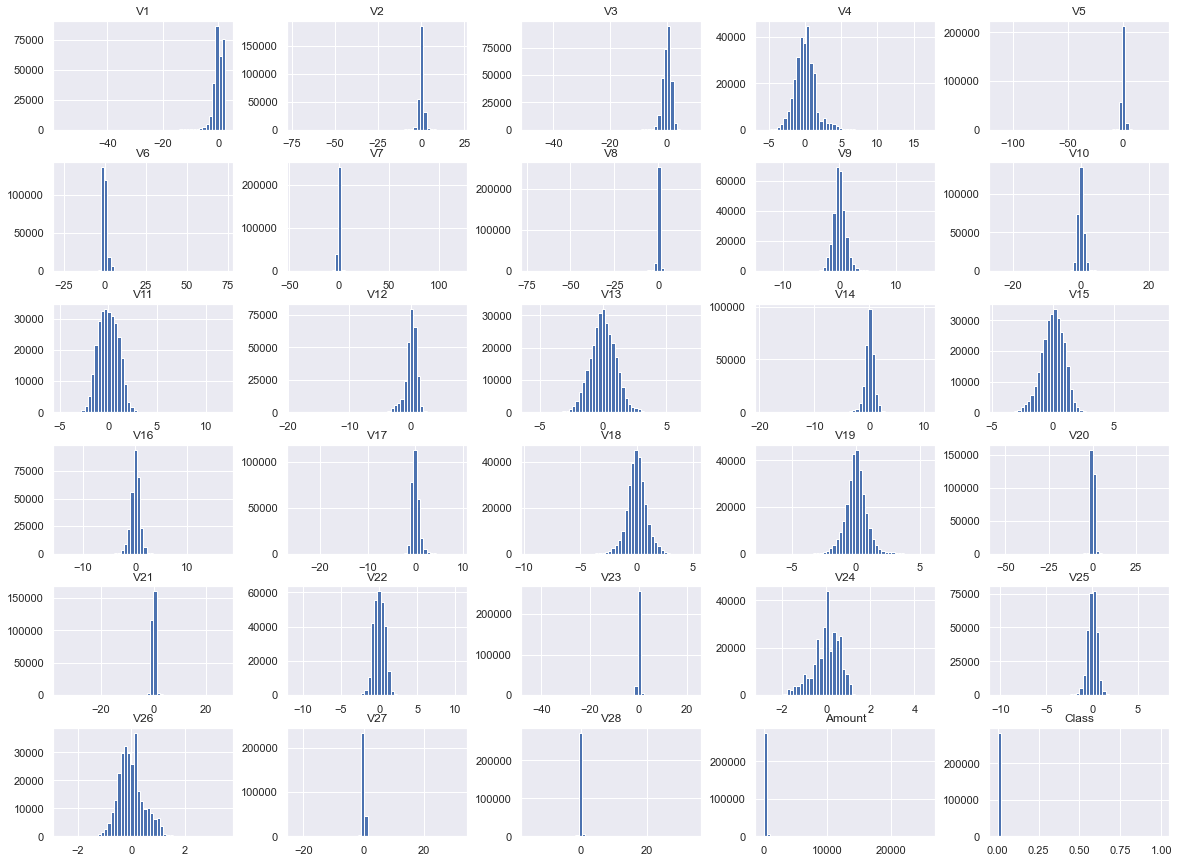

In [108]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

### We see that all variables are numerical. All variables other than time and amount have been transformed already. 

In [110]:
#find null vals
null_vals = df.isna().sum().to_frame(name="Total Nulls")
print(null_vals)

        Total Nulls
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22               0
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
Amount            0
Class             0


In [111]:
#get rid of duplicate data
print(df.shape)
df.drop_duplicates(subset=None, inplace=True)
print(df.shape)

(284807, 30)
(275663, 30)


<AxesSubplot:>

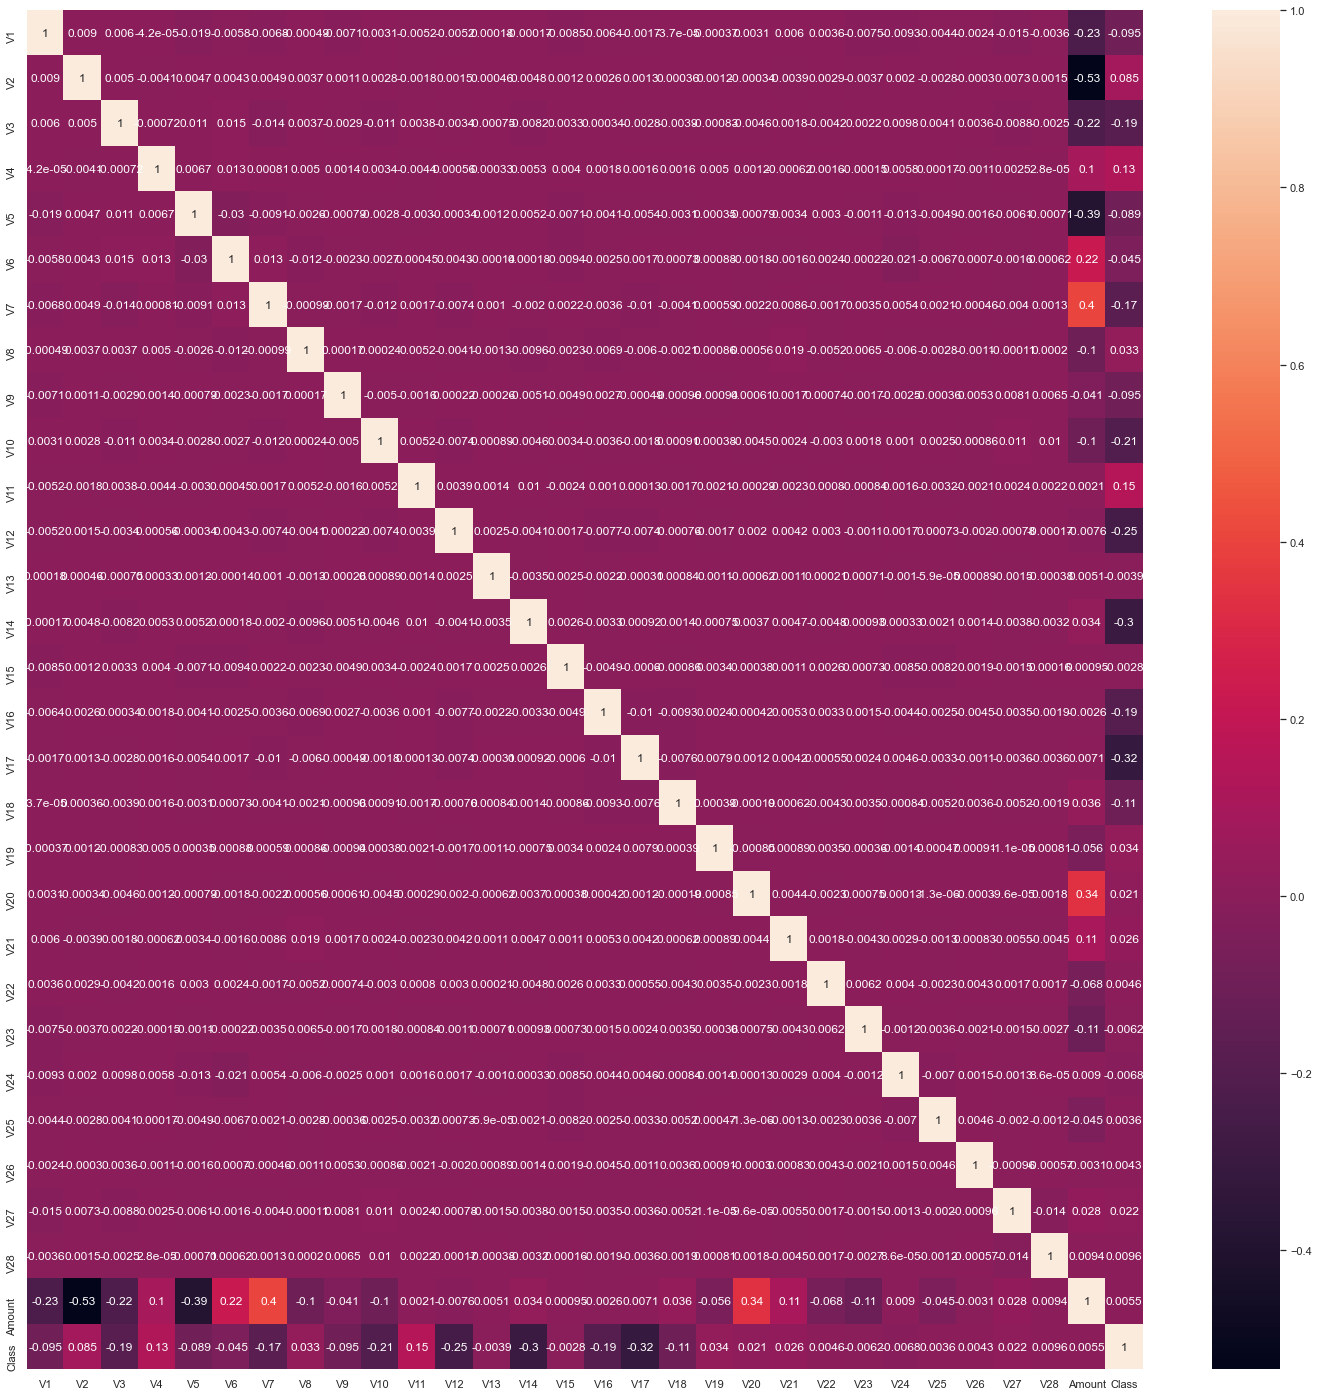

In [112]:
#visualize null vals with heatmap
corr_heatmap = df.corr()
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(corr_heatmap, annot=True)

In [113]:
#correlations to class variable
df[df.columns[:]].corr()['Class'][:]

V1       -0.094718
V2        0.084754
V3       -0.185772
V4        0.130313
V5       -0.088642
V6       -0.044777
V7       -0.173292
V8        0.033364
V9       -0.094583
V10      -0.208104
V11       0.151260
V12      -0.253150
V13      -0.003934
V14      -0.297550
V15      -0.002824
V16      -0.188222
V17      -0.317202
V18      -0.106447
V19       0.033784
V20       0.021349
V21       0.026239
V22       0.004612
V23      -0.006206
V24      -0.006831
V25       0.003593
V26       0.004341
V27       0.021888
V28       0.009642
Amount    0.005451
Class     1.000000
Name: Class, dtype: float64

C:\Users\YM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


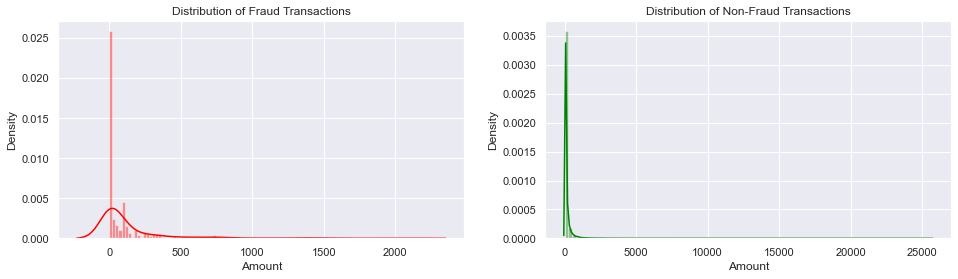

In [114]:
#visualization of Amount variable
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Amount'],bins=100,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Amount'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

#### Features  which do not have strong correlation with the outcome variable (< |0.1|)
V2, V5, V6, V8, V13, V15, V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount

In [115]:
#Transaction Counts
total_transactions = len(df)
nonfraud_trans = len(df[df.Class == 0])
fraud_trans_total = len(df[df.Class == 1])
fraud_percentage = round(fraud_trans_total / nonfraud_trans * 100, 2)

print('Total Transactions: ', total_transactions)
print('Non-Fraudulent Transactions: ', nonfraud_trans)
print('Fraudulent Transactions: ', fraud_trans_total)
print('Total percentage of Fraudulent Transactions: ', fraud_percentage)

Total Transactions:  275663
Non-Fraudulent Transactions:  275190
Fraudulent Transactions:  473
Total percentage of Fraudulent Transactions:  0.17


### We see that only 0.17% of cases are non-faudulent.

In [116]:
non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [117]:
#Descriptive Statistics for legitimate (nonfraud) transactions Amount 
print(non_fraud.Amount.describe())

count    275190.000000
mean         90.521154
std         253.198478
min           0.000000
25%           6.390000
50%          23.750000
75%          79.900000
max       25691.160000
Name: Amount, dtype: float64


In [118]:
#Descriptive Statistics for fraudulent transactions Amount
print(fraud.Amount.describe())

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


### We need to use a scalar due to the high variance. 

In [119]:
# Scale amount by log
df['amount_log'] = np.log(df.Amount + 0.01)

In [120]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'amount_log'],
      dtype='object')

In [121]:
#implement standard scalar on Amount col
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head(20))

0     0.233169
1    -0.347092
2     1.137702
3     0.130015
4    -0.081308
5    -0.343222
6    -0.338009
7    -0.196587
8     0.010353
9    -0.343182
10   -0.326911
11   -0.318263
12    0.122117
13   -0.249111
14   -0.125500
15   -0.294567
16   -0.306415
17   -0.354201
18   -0.172891
19   -0.337969
Name: Amount, dtype: float64


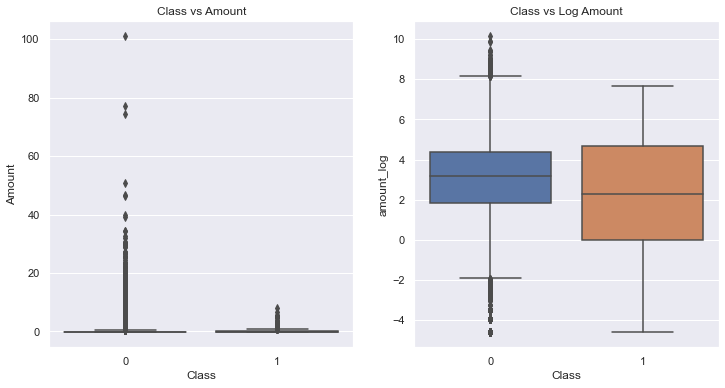

In [122]:
fig,axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12,6))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

plt.show()

C:\Users\YM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


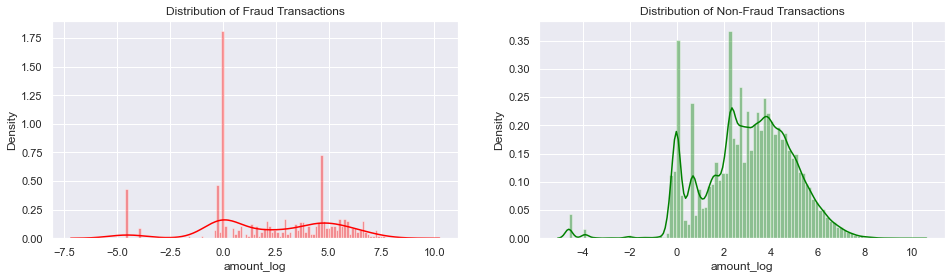

In [123]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['amount_log'],bins=100,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['amount_log'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

### Here we see a smaller difference between the log scaled amount so we will move forward with this scaling technique.

## Train-Test data split Full dataset

In [124]:
#full dataset train-test split
X = df.drop(['Class', 'Amount'], axis = 1).values
y = df['Class'].values #classification of fraud or non fraud is dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Modeling and Evaluation

In [125]:
def plot_confusion_matrix(cm, classes, title, normalize=False, cmap=plt.cm.Reds):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [126]:
#decision Tree 
from sklearn import metrics
tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [127]:
print('Accuracy score of the Decision Tree model is ', (metrics.accuracy_score(y_test, tree_pred)))
print('Precision score of the Decision Tree model is ', (metrics.precision_score(y_test, tree_pred)))
print('Recall score of the Decision Tree model is ', (metrics.recall_score(y_test, tree_pred)))
print('F1 score of the Decision Tree model is ', (metrics.f1_score(y_test, tree_pred)))

Accuracy score of the Decision Tree model is  0.9993651714943863
Precision score of the Decision Tree model is  0.8961038961038961
Recall score of the Decision Tree model is  0.71875
F1 score of the Decision Tree model is  0.7976878612716763


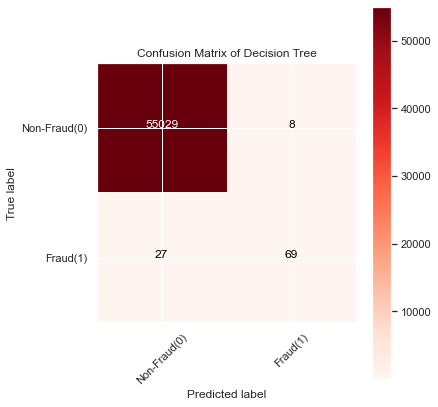

In [128]:
tree_matrix = confusion_matrix(y_test, tree_pred, labels=[0, 1])
plt.rcParams['figure.figsize'] = (6, 6)
tree_cm_plot = plot_confusion_matrix(tree_matrix,
                                     classes=['Non-Fraud(0)', 'Fraud(1)'],
                                     normalize=False, title='Decision Tree')
plt.show()

In [129]:
#logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [130]:
print('Accuracy score of the logistic regression model is ', (metrics.accuracy_score(y_test, log_reg_pred)))
print('Precision score of the logistic regression model is ', (metrics.precision_score(y_test, log_reg_pred)))
print('Recall score of the logistic regression model is ', (metrics.recall_score(y_test, log_reg_pred)))
print('F1 score of the logistic regression model is ', (metrics.f1_score(y_test, log_reg_pred)))

Accuracy score of the logistic regression model is  0.999129378049444
Precision score of the logistic regression model is  0.8870967741935484
Recall score of the logistic regression model is  0.5729166666666666
F1 score of the logistic regression model is  0.6962025316455696


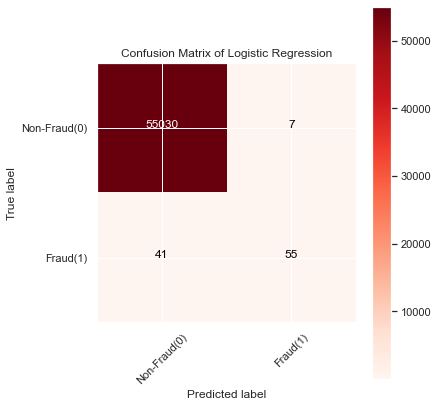

In [131]:
lr_matrix = confusion_matrix(y_test, log_reg_pred, labels=[0, 1]) 
lr_cm_plot = plot_confusion_matrix(lr_matrix,
                                   classes=['Non-Fraud(0)', 'Fraud(1)'],
                                   normalize=False, title='Logistic Regression')
plt.show()


In [132]:
#Random Forest
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [133]:
print('Accuracy score of the random forest classifier model is ', (metrics.accuracy_score(y_test, rf_pred)))
print('Precision score of the random forest classifier model is ', (metrics.precision_score(y_test, rf_pred)))
print('Recall score of the random forest classifier model is ', (metrics.recall_score(y_test, rf_pred)))
print('F1 score of the random forest classifier model is ', (metrics.f1_score(y_test, rf_pred)))

Accuracy score of the random forest classifier model is  0.9993288955797798
Precision score of the random forest classifier model is  0.927536231884058
Recall score of the random forest classifier model is  0.6666666666666666
F1 score of the random forest classifier model is  0.7757575757575758


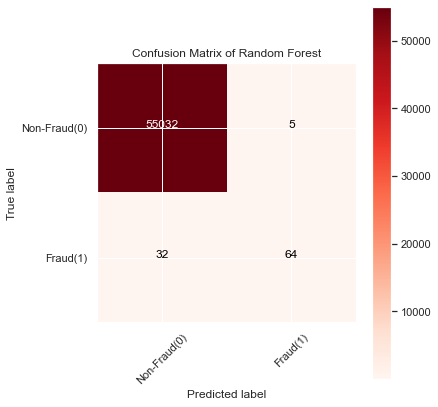

In [134]:
rf_matrix = confusion_matrix(y_test, rf_pred, labels=[0, 1])  # Random Forest Tree
rf_cm_plot = plot_confusion_matrix(rf_matrix,
                                   classes=['Non-Fraud(0)', 'Fraud(1)'],
                                   normalize=False, title='Random Forest')
plt.show()

### Techniques to deal with class imbalance

In [135]:
from imblearn.over_sampling import SMOTE, ADASYN

#### SMOTE

In [136]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (220530, 29)
y_train:  (220530,)
X_test:  (55133, 29)
y_test:  (55133,)


In [137]:
smote= SMOTE(sampling_strategy='minority')
X_train_smote,y_train_smote=smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = X_test, y_test

In [138]:
print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train_smote:  (440306, 29)
y_train_smote:  (440306,)
X_test_smote:  (55133, 29)
y_test_smote:  (55133,)


In [139]:
#decision Tree 
from sklearn import metrics
tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree_model.fit(X_train_smote, y_train_smote)
tree_pred = tree_model.predict(X_test_smote)

In [140]:
print('Accuracy score of the Decision Tree SMOTE model is ', (metrics.accuracy_score(y_test_smote, tree_pred)))
print('Precision score of the Decision Tree SMOTE model is ', (metrics.precision_score(y_test_smote, tree_pred)))
print('Recall score of the Decision Tree SMOTE model is ', (metrics.recall_score(y_test_smote, tree_pred)))
print('F1 score of the Decision Tree SMOTE model is ', (metrics.f1_score(y_test_smote, tree_pred)))

Accuracy score of the Decision Tree SMOTE model is  0.9896976402517549
Precision score of the Decision Tree SMOTE model is  0.12300319488817892
Recall score of the Decision Tree SMOTE model is  0.8020833333333334
F1 score of the Decision Tree SMOTE model is  0.21329639889196675


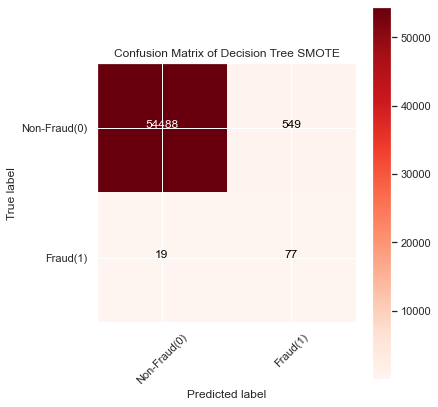

In [141]:
tree_matrix = confusion_matrix(y_test_smote, tree_pred, labels=[0, 1])
plt.rcParams['figure.figsize'] = (6, 6)
tree_cm_plot = plot_confusion_matrix(tree_matrix,
                                     classes=['Non-Fraud(0)', 'Fraud(1)'],
                                     normalize=False, title='Decision Tree SMOTE')
plt.show()

In [142]:
#Random Forest SMOTE 
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test_smote)

In [143]:
print('Accuracy score of the random forest classifier SMOTE model is ', (metrics.accuracy_score(y_test_smote, rf_pred)))
print('Precision score of the random forest classifier SMOTE model is ', (metrics.precision_score(y_test_smote, rf_pred)))
print('Recall score of the random forest classifier SMOTE model is ', (metrics.recall_score(y_test_smote, rf_pred)))
print('F1 score of the random forest classifier SMOTE model is ', (metrics.f1_score(y_test_smote, rf_pred)))

Accuracy score of the random forest classifier SMOTE model is  0.9949032339977871
Precision score of the random forest classifier SMOTE model is  0.22713864306784662
Recall score of the random forest classifier SMOTE model is  0.8020833333333334
F1 score of the random forest classifier SMOTE model is  0.35402298850574715


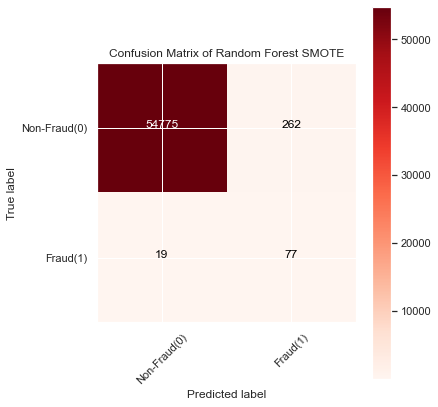

In [144]:
rf_matrix = confusion_matrix(y_test_smote, rf_pred, labels=[0, 1])  # Random Forest Tree
rf_cm_plot = plot_confusion_matrix(rf_matrix,
                                   classes=['Non-Fraud(0)', 'Fraud(1)'],
                                   normalize=False, title='Random Forest SMOTE')
plt.show()

#### ADASYN 

In [145]:
adasyn= ADASYN(sampling_strategy='minority')
X_train_adasyn,y_train_adasyn=adasyn.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = X_test, y_test

print("X_train_adasyn: ",X_train_adasyn.shape)
print("y_train_adasyn: ",y_train_adasyn.shape)
print("X_test_adasyn: ",X_test_adasyn.shape)
print("y_test_adasyn: ",y_test_adasyn.shape)

X_train_adasyn:  (440316, 29)
y_train_adasyn:  (440316,)
X_test_adasyn:  (55133, 29)
y_test_adasyn:  (55133,)


In [146]:
#decision Tree 
from sklearn import metrics
tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree_model.fit(X_train_adasyn, y_train_adasyn)
tree_pred = tree_model.predict(X_test_adasyn)

In [147]:
print('Accuracy score of the Decision Tree ADASYN model is ', (metrics.accuracy_score(y_test_adasyn, tree_pred)))
print('Precision score of the Decision Tree ADASYN model is ', (metrics.precision_score(y_test_adasyn, tree_pred)))
print('Recall score of the Decision Tree ADASYN model is ', (metrics.recall_score(y_test_adasyn, tree_pred)))
print('F1 score of the Decision Tree ADASYN Model is ', (metrics.f1_score(y_test_adasyn, tree_pred)))

Accuracy score of the Decision Tree ADASYN model is  0.8558032394391744
Precision score of the Decision Tree ADASYN model is  0.01071517567904311
Recall score of the Decision Tree ADASYN model is  0.8958333333333334
F1 score of the Decision Tree ADASYN Model is  0.021177049987687765


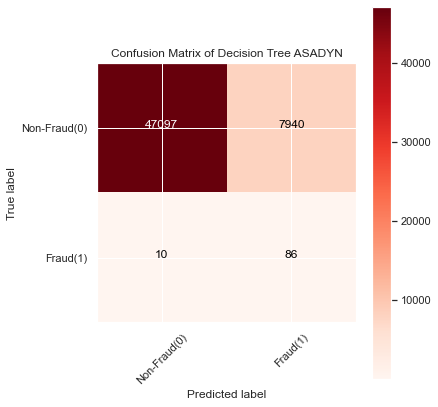

In [148]:
tree_matrix = confusion_matrix(y_test_adasyn, tree_pred, labels=[0, 1])
plt.rcParams['figure.figsize'] = (6, 6)
tree_cm_plot = plot_confusion_matrix(tree_matrix,
                                     classes=['Non-Fraud(0)', 'Fraud(1)'],
                                     normalize=False, title='Decision Tree ASADYN')
plt.show()

In [149]:
# Random Forest ASADYN
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train_adasyn, y_train_adasyn)
rf_pred = rf.predict(X_test_adasyn)

In [150]:
print('Accuracy score of the random forest classifier ASADYN model is ', (metrics.accuracy_score(y_test_adasyn, rf_pred)))
print('Precision score of the random forest classifier ASADYN model is ', (metrics.precision_score(y_test_adasyn, rf_pred)))
print('Recall score of the random forest classifier ASADYN model is ', (metrics.recall_score(y_test_adasyn, rf_pred)))
print('F1 score of the random forest classifier ASADYN model is ', (metrics.f1_score(y_test_adasyn, rf_pred)))

Accuracy score of the random forest classifier ASADYN model is  0.9558703498811963
Precision score of the random forest classifier ASADYN model is  0.03316020775069916
Recall score of the random forest classifier ASADYN model is  0.8645833333333334
F1 score of the random forest classifier ASADYN model is  0.06387071950750288


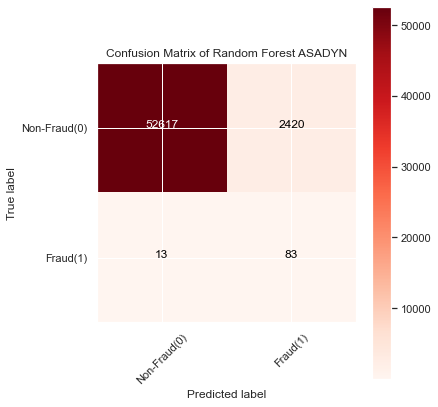

In [151]:
rf_matrix = confusion_matrix(y_test_smote, rf_pred, labels=[0, 1])  # Random Forest Tree
rf_cm_plot = plot_confusion_matrix(rf_matrix,
                                   classes=['Non-Fraud(0)', 'Fraud(1)'],
                                   normalize=False, title='Random Forest ASADYN')
plt.show()